# Timeseries - Boulder temperature measurements

In [2]:
# By line: RRB 2021-03-22
# Script aims to:
# - Load txt file
# - Calculate daily averages of the diel cycle
# - Plot timeseries
# - Overplot years of the diel cycle for a particular day

### Load python packages

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import datetime
from pathlib import Path                   # System agnostic paths

### Create reusable functions

In [2]:
# Re-usable plotting call
def ts_plot(time_arr,val_arr,color_choice,label_string):
    plt.plot(time_arr, val_arr, '-ok', label=label_string,
         color=color_choice,
         markersize=8, linewidth=3,
         markerfacecolor=color_choice,
         markeredgecolor='grey',
         markeredgewidth=1)

In [57]:
# Month averages for the whole timeset
def cal_clim_month(pandas_DataArray):
    clim_cyc = pd.DataFrame(np.zeros((24, 2)),columns=['Clim_avg','Clim_sd'])
    num_obs = clim_cyc.shape[0]
    #calculate climatological month values
    for i in range(num_obs):
        clim_cyc['Clim_avg'][i] = np.nanmean(pandas_DataArray[pandas_DataArray.index.hour == i+1])
        clim_cyc['Clim_sd'][i] = np.nanstd(pandas_DataArray[pandas_DataArray.index.hour == i+1])
    #clim_cyc.index = np.arange(1, 24, step=1)
    return clim_cyc

### Load measurements and create month averages

In [49]:
# From https://www.ncdc.noaa.gov/isd
# units: degC for temperature i nunits of tenths of degrees
result_dir = Path("../../data/")
temp_file = '2516587.csv'
data = pd.read_csv(str(result_dir/temp_file), header=0, 
                 na_values=[99999,999,99,9], 
                 engine='python')
data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,KA1,KA2,MV1,MW1,QUALITY_CONTROL.1,REM,REPORT_TYPE.1,SLP,SOURCE.1,TMP
0,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2010-02-01T21:00:00,4,FM-15,KBDU,V020,...,NaN,NaN,NaN,NaN,V020,MET065METAR KBDU 012056Z AUTO 32010G14KT 10SM ...,FM-15,"99999,9",4,"+0090,1"
1,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2010-02-01T21:16:00,4,AUTO,KBDU,V020,...,NaN,NaN,NaN,NaN,V020,MET065METAR KBDU 012116Z AUTO 27009G16KT 10SM ...,AUTO,"99999,9",4,"+0100,1"
2,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2010-02-01T21:36:00,4,AUTO,KBDU,V020,...,NaN,NaN,NaN,NaN,V020,MET062METAR KBDU 012136Z AUTO 31014KT 10SM CLR...,AUTO,"99999,9",4,"+0090,1"
3,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2010-02-01T22:00:00,4,FM-15,KBDU,V020,...,NaN,NaN,NaN,NaN,V020,MET065METAR KBDU 012156Z AUTO 30012G19KT 10SM ...,FM-15,"99999,9",4,"+0090,1"
4,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2010-02-01T22:03:00,4,AUTO,KBDU,V020,...,NaN,NaN,NaN,NaN,V020,MET065METAR KBDU 012203Z AUTO 29009G15KT 10SM ...,AUTO,"99999,9",4,"+0080,1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284476,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2020-12-31T22:35:00,4,FM-15,NaN,V020,...,NaN,NaN,NaN,NaN,V020,MET065METAR KBDU 312235Z AUTO 36004KT 10SM OVC...,FM-15,"99999,9",4,"+0030,1"
284477,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2020-12-31T22:55:00,4,FM-15,NaN,V020,...,NaN,NaN,NaN,NaN,V020,MET065METAR KBDU 312255Z AUTO 35003KT 10SM OVC...,FM-15,"99999,9",4,"+0030,1"
284478,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2020-12-31T23:15:00,4,FM-15,NaN,V020,...,NaN,NaN,NaN,NaN,V020,MET065METAR KBDU 312315Z AUTO 04003KT 10SM OVC...,FM-15,"99999,9",4,"+0020,1"
284479,72053300160,"BOULDER MUNICIPAL AIRPORT, CO US",40.033,-105.217,1612.1,2020-12-31T23:35:00,4,FM-15,NaN,V020,...,NaN,NaN,NaN,NaN,V020,MET065METAR KBDU 312335Z AUTO 00000KT 10SM OVC...,FM-15,"99999,9",4,"+0020,1"


In [88]:
meas_date = pd.to_datetime(data['DATE'],format='%Y-%m-%dT%H:%M:%S', errors='coerce')
# temperature in tenths of degrees
split_data = data['TMP'].str.split(',',expand=True)
meas_var = split_data[0].astype(float)/10
meas_var.index = meas_date
meas_var

DATE
2010-02-01 21:00:00     9.0
2010-02-01 21:16:00    10.0
2010-02-01 21:36:00     9.0
2010-02-01 22:00:00     9.0
2010-02-01 22:03:00     8.0
                       ... 
2020-12-31 22:35:00     3.0
2020-12-31 22:55:00     3.0
2020-12-31 23:15:00     2.0
2020-12-31 23:35:00     2.0
2020-12-31 23:55:00     2.0
Name: 0, Length: 284481, dtype: float64

### Resample on hourly timescale

In [51]:
#can choose mean, max, min
meas_var_hourly = meas_var.resample('H').mean()
meas_var_hourly[meas_var_hourly > 200. ] = np.nan

### Plot the value versus time.

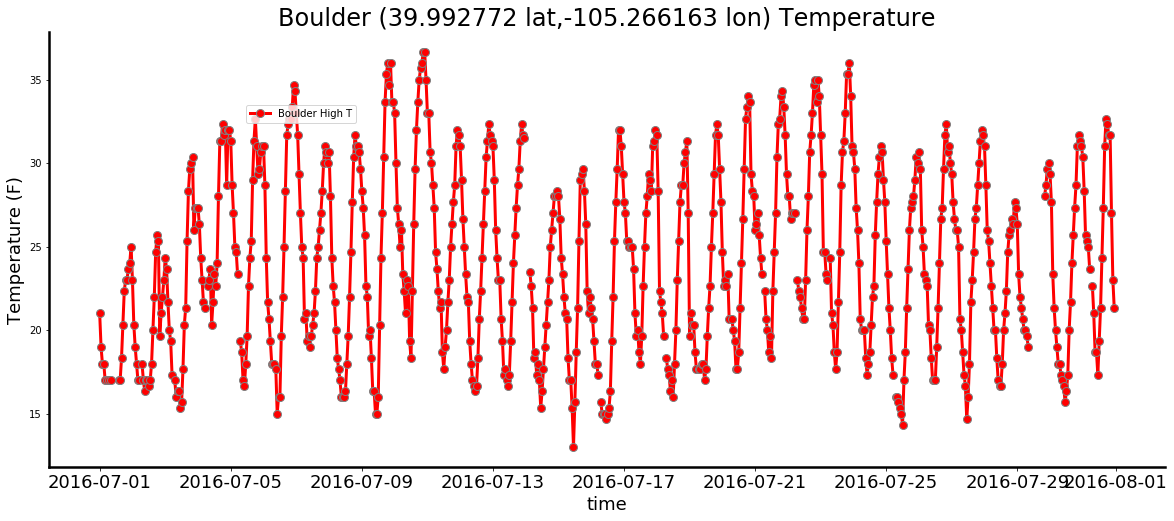

In [87]:
plt.figure(figsize=(20,8))
ax = plt.axes()

ts_plot(meas_var_hourly['2016-07':'2016-07'].index,meas_var_hourly['2016-07':'2016-07'],'red','Boulder High T')

# axes format
plt.xticks(fontsize=18)
#ax.set_ylim(0, 0.4)
#plt.yticks(np.arange(0, 0.45, step=0.05), fontsize=18)

# adjust border
ax.spines["left"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#titles
plt.title('Boulder (39.992772 lat,-105.266163 lon) Temperature',fontsize=24)        
plt.xlabel('time',fontsize=18)
plt.ylabel('Temperature (F)',fontsize=18)

# legend
plt.legend(bbox_to_anchor=(0.28, 0.78),loc='lower right')

plt.show() 

### Average Daily Cycle

In [129]:
meas_var_select = meas_var_hourly[meas_var_hourly.index.month == 6]


In [85]:
clim_cyc = pd.DataFrame(np.zeros((24, 2)),columns=['Clim_avg','Clim_sd'])
clim_cyc.index = np.arange(0, 24, step=1)
num_obs = clim_cyc.shape[0]
for i in range(num_obs):
    clim_cyc['Clim_avg'][i] = np.nanmean(meas_var_select[meas_var_select.index.hour == i])
    clim_cyc['Clim_sd'][i] = np.nanstd(meas_var_select[meas_var_select.index.hour == i])

clim_cyc

,Clim_avg,Clim_sd
0,25.593073,5.061610
1,24.342188,4.728722
2,22.344462,4.346153
3,20.964063,4.094613
4,20.051202,4.011048
5,19.110417,3.941428
6,19.793011,3.554893
7,17.466097,3.848924
8,16.672878,3.767512
9,15.865524,3.666956


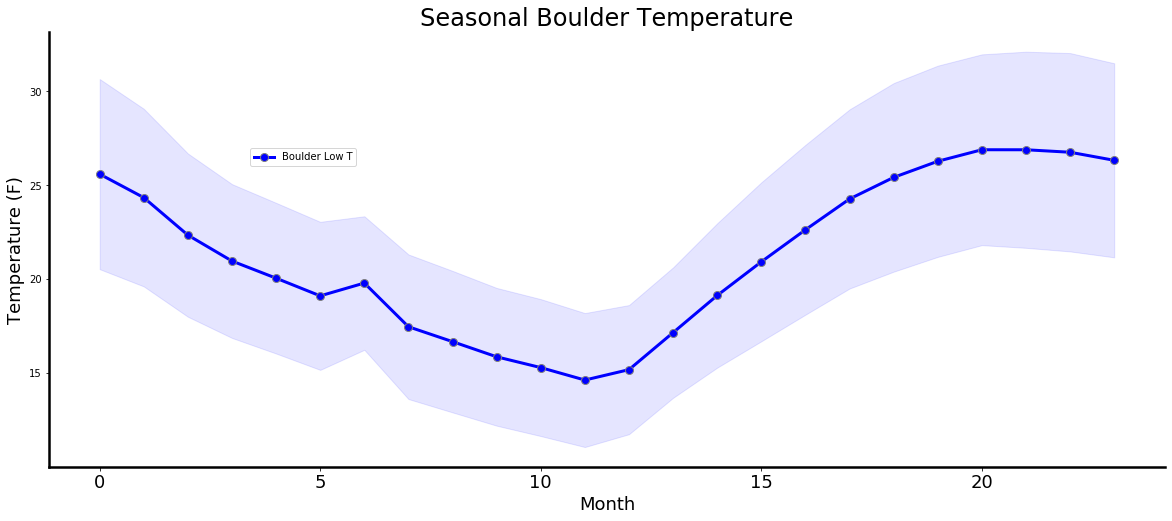

In [86]:
plt.figure(figsize=(20,8))
ax = plt.axes()

ts_plot(clim_cyc.index,clim_cyc['Clim_avg'],'blue','Boulder Low T')
plt.fill_between(clim_cyc.index,clim_cyc['Clim_avg'] - clim_cyc['Clim_sd'],
                 clim_cyc['Clim_avg'] + clim_cyc['Clim_sd'],
                 color='blue', alpha=0.1)


# axes format
plt.xticks(fontsize=18)
#ax.set_ylim(0, 0.25)
#plt.yticks(np.arange(0, 0.30, step=0.05), fontsize=18)

# adjust border
ax.spines["left"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#titles
plt.title('Seasonal Boulder Temperature',fontsize=24)        
plt.xlabel('Month',fontsize=18)
plt.ylabel('Temperature (F)',fontsize=18)

# legend
plt.legend(bbox_to_anchor=(0.28, 0.68),loc='lower right')

plt.show() 

### Overplot years for tmax
Create year arrays

In [130]:
startyear = 2010
year_array = np.arange(startyear, 2021, step=1)
year_str = year_array.astype(str)
num_year = year_array.shape[0]
meas_var_select_b = meas_var_select*9/5 +32

In [131]:
clim_cyc.index
yearday = str(y)
meas_var_select[str(y)]

DATE
2020-06-01 00:00:00    26.333333
2020-06-01 01:00:00    25.666667
2020-06-01 02:00:00    22.666667
2020-06-01 03:00:00    19.666667
2020-06-01 04:00:00    19.333333
                         ...    
2020-06-30 19:00:00    25.333333
2020-06-30 20:00:00    26.000000
2020-06-30 21:00:00    26.666667
2020-06-30 22:00:00    27.000000
2020-06-30 23:00:00    25.333333
Name: 0, Length: 720, dtype: float64

Do the plotting

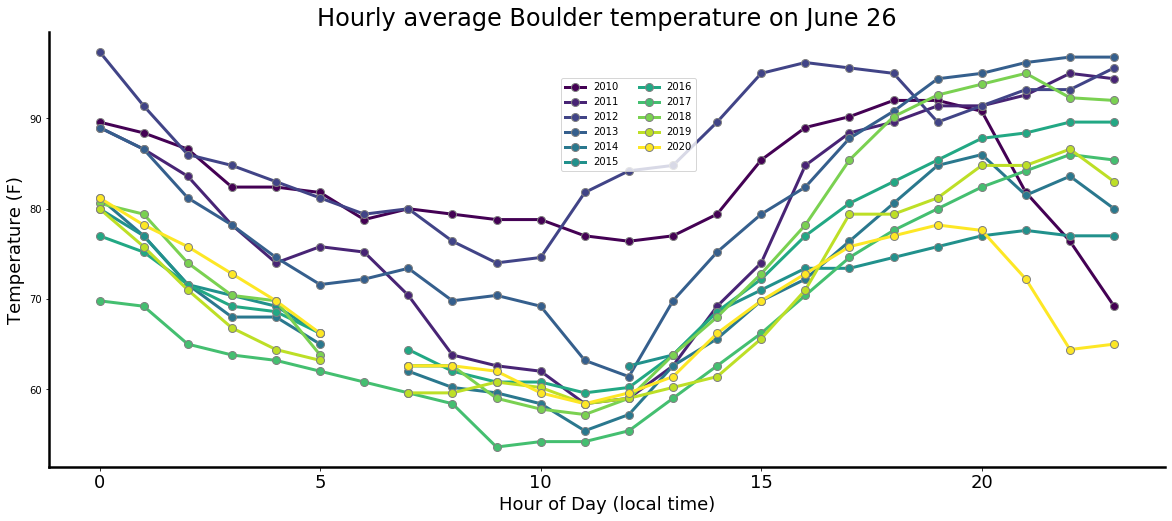

In [135]:
day = 26
plt.figure(figsize=(20,8))
ax = plt.axes()

# Different colors for different lines
# colormaps at https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
colormap = plt.cm.viridis
colors = [colormap(i) for i in np.linspace(0, 1,num_year)]

for y in year_array:
    plt.plot(clim_cyc.index, meas_var_select_b[str(y)+'-06-'+str(day)], '-ok', label=year_str[y-startyear],
             color=colors[y-startyear], markerfacecolor=colors[y-startyear], markersize=8,
             linewidth=3, markeredgecolor='grey',
             markeredgewidth=1)

# axes format
plt.xticks(fontsize=18)
#ax.set_ylim(0, 0.35)
#plt.yticks(np.arange(0, 0.40, step=0.05), fontsize=18)

# adjust border
ax.spines["left"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#titles
plt.title('Hourly average Boulder temperature on June '+str(day),fontsize=24)        
plt.xlabel('Hour of Day (local time)',fontsize=18)
plt.ylabel('Temperature (F)',fontsize=18)

# legend
plt.legend(bbox_to_anchor=(0.58, 0.68),loc='lower right', borderaxespad=0., ncol=2)

plt.show() 
